# **Computer Vision Track - Assignment 1**
## **Artificial Neural Network for Image Classification**

In this assignment, we explore the fundamentals of building a neural network for image classification. Image classification is a core task in computer vision, where the goal is to correctly identify and categorize objects in images. We will design and implement a neural network from scratch using popular machine learning libraries, applying key concepts such as activation functions, and backpropagation. By training the model on a labeled dataset, we aim to evaluate its performance and understand how different network architectures influence classification accuracy. This assignment serves as a practical introduction to deep learning in computer vision.

====================================================================================================

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 1**

The code below imports essential libraries for building and training an artificial neural network (ANN) using PyTorch.
1) <blue>**torch**</blue> and <blue>**torch.nn**</blue> provide core functionality for tensors and neural networks.
2) <blue>**optim**</blue> offers optimization algorithms (like <green>**Adam**</green>).
3) <blue>**torchvision**</blue> helps with image-related tasks, and transforms aids in image preprocessing.
4) <blue>**DataLoader**</blue> is used to load datasets in batches.
5) Libraries like <blue>**matplotlib**</blue>, <blue>**seaborn**</blue>, and <blue>**sklearn.metrics**</blue> help visualize results and evaluate the model using metrics such as <green>**accuracy**</green>, <green>**precision**</green>, <green>**recall**</green> etc.

In [3]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 2**
1) The <blue>**device**</blue> variable ensures the model runs on a <green>**GPU**</green> if available; otherwise, it falls back to a <green>**CPU**</green>.
2) The <blue>**transform**</blue> object defines the <green>**preprocessing**</green> steps for images
3) <blue>**ToTensor()**</blue> converts images to tensors.
4) <blue>**Normalize((0.5,), (0.5,))**</blue> normalizes the images to a range between -1 and 1, helping with better convergence during training.

In [4]:
# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the transformations (Normalization)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the dataset to range [-1, 1]
])

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 3**
1) This code outlines loading the <blue>**MNIST**</blue> dataset for <green>**handwritten digit recognition**</green>.
2) The <blue>**train_loader**</blue> and <blue>**test_loader**</blue> are used to load the datasets in batches of 64, with shuffling applied only to the training set.
3) The <blue>**dataiter**</blue> and next commands allow viewing a batch of images and labels, which can be useful for visualization before training.


Note: The placeholders **"None"** need to be replaced with the correct dataset-loading code.

In [5]:
# Load the MNIST dataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load training and test datasets
traindataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
testdataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

trainloader = DataLoader(dataset=traindataset, batch_size=64, shuffle=True)
testloader = DataLoader(dataset=testdataset, batch_size=64, shuffle=False)

# Visualize a batch of images (optional)
dataiter = iter(trainloader)
images, labels = next(dataiter)

100%|██████████| 9.91M/9.91M [00:00<00:00, 57.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.66MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.95MB/s]


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 4**
1) This code defines a simple <green>**feedforward artificial neural network (ANN)**</green> for classifying MNIST digits.
2) The model has three fully connected layers <blue>**(fc1, fc2, fc3)**</blue>, and the final layer outputs predictions for <green>**10 classes (digits 0–9)**</green>.
3) The <green>**forward pass**</green> describes how the input data flows through the network
4) The input image is first <green>**flattened**</green>.
5) It passes through fully connected layers with <blue>**ReLU activation function**</blue>.

Note: Replace the placeholders **"None"** with the appropriate numbers of units and activation functions in each layer.

In [6]:
# Define the neural network model
import torch.nn as nn

class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # First hidden layer: 128 units
        self.fc2 = nn.Linear(128, 64)     # Second hidden layer: 64 units
        self.fc3 = nn.Linear(64, 10)      # Output layer: 10 units (classes)

    def forward(self, x):
        x = x.view(-1, 28*28)             # Flatten the image
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 5**
1) The <blue>**ANN model**</blue> is instantiated and moved to the <green>**selected device (CPU or GPU)**</green>.
2) The loss function is set to <blue>**CrossEntropyLoss**</blue>, which is suitable for <green>**multi-class classification**</green> problems like MNIST.
3) The optimizer is <blue>**Adam**</blue>, with a <blue>**learning rate**</blue> of <green>**0.001**</green>, used to adjust the model parameters during training based on gradients computed from the loss.

In [7]:
# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 6**
This code trains the neural network over a specified number of epochs (num_epochs).
For each batch of images and labels, the following steps are performed:
1) <blue>**Data Movement**</blue>: Images and labels are moved to the <green>**device (CPU or GPU)**</green>.
2) <blue>**Forward Pass**</blue>: Images pass through the network to compute the <green>**output predictions**</green>.
3) <blue>**Loss Calculation**</blue>: The loss between the predictions and true labels is computed and added to <blue>**ls_losses**</blue> for tracking.
4) <blue>**Backpropagation and Optimization**</blue>: Gradients are calculated using backpropagation, and the optimizer <green>**updates the model parameters**</green> based on these gradients.

Every 100 batches, the loss is printed to monitor training progress.

In [8]:
# Training the network
numepochs = 5
lslosses = []

for epoch in range(numepochs):
    for i, (images, labels) in enumerate(trainloader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        lslosses.append(loss.detach().cpu().numpy())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{numepochs}], Step [{i+1}/{len(trainloader)}], Loss: {loss.item():.4f}")

Epoch [1/5], Step [100/938], Loss: 0.5468
Epoch [1/5], Step [200/938], Loss: 0.4076
Epoch [1/5], Step [300/938], Loss: 0.2156
Epoch [1/5], Step [400/938], Loss: 0.4882
Epoch [1/5], Step [500/938], Loss: 0.1713
Epoch [1/5], Step [600/938], Loss: 0.3874
Epoch [1/5], Step [700/938], Loss: 0.1924
Epoch [1/5], Step [800/938], Loss: 0.3624
Epoch [1/5], Step [900/938], Loss: 0.3341
Epoch [2/5], Step [100/938], Loss: 0.1973
Epoch [2/5], Step [200/938], Loss: 0.2293
Epoch [2/5], Step [300/938], Loss: 0.0809
Epoch [2/5], Step [400/938], Loss: 0.1183
Epoch [2/5], Step [500/938], Loss: 0.1351
Epoch [2/5], Step [600/938], Loss: 0.2310
Epoch [2/5], Step [700/938], Loss: 0.0770
Epoch [2/5], Step [800/938], Loss: 0.0664
Epoch [2/5], Step [900/938], Loss: 0.1181
Epoch [3/5], Step [100/938], Loss: 0.0297
Epoch [3/5], Step [200/938], Loss: 0.1049
Epoch [3/5], Step [300/938], Loss: 0.1896
Epoch [3/5], Step [400/938], Loss: 0.0562
Epoch [3/5], Step [500/938], Loss: 0.0590
Epoch [3/5], Step [600/938], Loss:

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 7**
1) This code plots the <blue>**training losses**</blue> that were recorded in <blue>**ls_losses**</blue> during training.
2) The <blue>**x-axis**</blue> represents the <green>**number of samples (batches)**</green> seen during training, and the <blue>**y-axis**</blue> shows the <green>**corresponding loss**</green>.
3) It provides a visual representation of how the <green>**model's loss decreases over time**</green>, indicating whether the training is progressing well.

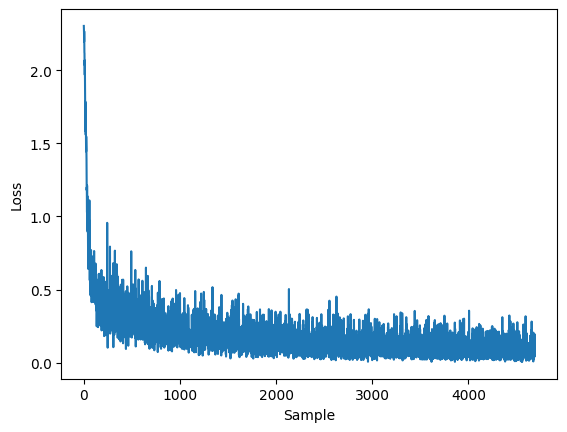

In [9]:
# Plot Losses

import numpy as np
import matplotlib.pyplot as plt

xaxis = np.arange(0, len(lslosses), 1)
plt.plot(xaxis, lslosses)
plt.xlabel("Sample")
plt.ylabel("Loss")
plt.show()

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 8**
This block evaluates the model on the test dataset.\
<blue>**model.eval()**</blue> sets the model to <green>**evaluation mode**</green>, disabling dropout layers and stopping the computation of gradients to save memory and speed up computations.
For each batch of test images:
1) <blue>**Data Movement**</blue>: Images and labels are moved to the <green>**device (CPU/GPU)**</green>.
2) <blue>**Forward Pass**</blue>: Images pass through the network to compute <green>**predictions**</green>.
3) <blue>**Accuracy Calculation**</blue>: The model's predictions are compared to the true labels, and the <green>**accuracy**</green> is calculated.
4) <blue>**Storing Results**</blue>: Predictions and true labels are saved to <green>**calculate metrics**</green> later.

At the end of testing, the accuracy of the model on the test dataset is printed.

Note: Replace the placeholders **"None"** with the appropriate code for data movement, prediction, and storing results.

In [10]:
# Testing the model
model.eval()
allpreds = []
alllabels = []

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        allpreds.extend(predicted.cpu().numpy())
        alllabels.extend(labels.cpu().numpy())
print(f"Accuracy of the network on the test images: {100 * correct / total:.2f}%")


Accuracy of the network on the test images: 96.72%


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 9**
This code calculates key performance metrics to evaluate the model:
1) <blue>**Accuracy**</blue>: Percentage of correctly classified samples.
2) <blue>**Precision**</blue>: Proportion of true positive predictions out of all positive predictions.
3) <blue>**Recall**</blue>: Proportion of true positives out of actual positive samples.
4) <blue>**F1-Score**</blue>: <green>**Harmonic mean**</green> of precision and recall.
5) The <blue>**confusion matrix**</blue> is also calculated, showing the number of correct and incorrect predictions for each class. It is visualized using a <green>**heatmap**</green>, where the <blue>**rows**</blue> represent <green>**true labels**</green>, and the <blue>**columns**</blue> represent <green>**predicted labels**</green>.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

Accuracy: 96.72
Precision: 0.9675
Recall: 0.9672
F1-Score: 0.9672


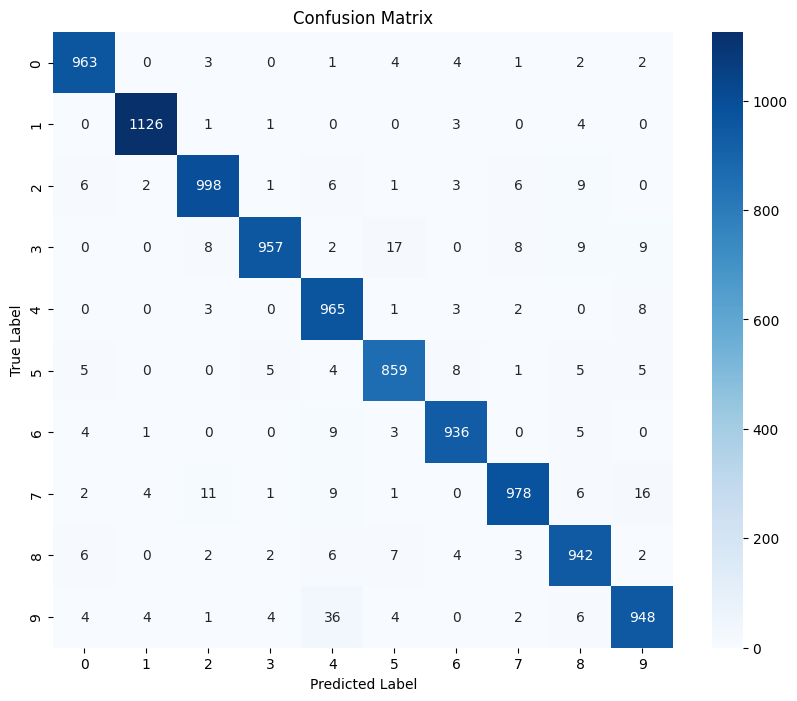

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

allpreds = np.array(allpreds)
alllabels = np.array(alllabels)

accuracy = accuracy_score(alllabels, allpreds)
precision = precision_score(alllabels, allpreds, average='weighted')
recall = recall_score(alllabels, allpreds, average='weighted')
f1 = f1_score(alllabels, allpreds, average='weighted')

print(f"Accuracy: {accuracy*100:.2f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

confmatrix = confusion_matrix(alllabels, allpreds)
plt.figure(figsize=(10,8))
sns.heatmap(confmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


### **Step 10 (For Advanced Level, optional for Basic Level)**

Hyperparameter tuning is a crucial step in optimizing the performance of a neural network. It involves finding the best set of hyperparameters that control the learning process and the model's architecture, such as the learning rate, batch size, number of epochs, and the number of units in each layer.

Techniques like grid search or random search can be employed to systematically explore different combinations of these hyperparameters and identify the values that yield the best results on a validation set. This process helps in improving the model's accuracy and generalization capabilities.

In [12]:
import itertools

# Define grid of hyperparameters
paramgrid = {
    'learningrate': [0.001, 0.01],
    'batchsize': [64, 128],
    'numepochs': [3, 5]
}

bestaccuracy = 0
bestparams = {}

# Iterate through combinations
for lr, bs, epochs in itertools.product(paramgrid['learningrate'], paramgrid['batchsize'], paramgrid['numepochs']):
    print(f"Training with LR={lr}, Batch Size={bs}, Epochs={epochs}")

    # Re-initialize model, optimizer, loss
    model = ANN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Update DataLoader batch size
    trainloader = DataLoader(dataset=traindataset, batch_size=bs, shuffle=True)
    testloader = DataLoader(dataset=testdataset, batch_size=bs, shuffle=False)

    # Training loop
    for epoch in range(epochs):
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluation loop
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Accuracy for LR={lr}, Batch Size={bs}, Epochs={epochs}: {accuracy:.2f}%")

    # Store best parameters
    if accuracy > bestaccuracy:
        bestaccuracy = accuracy
        bestparams = {'learningrate': lr, 'batchsize': bs, 'numepochs': epochs}

print("Best Hyperparameters:", bestparams)
print(f"Best Accuracy: {bestaccuracy:.2f}%")


Training with LR=0.001, Batch Size=64, Epochs=3
Accuracy for LR=0.001, Batch Size=64, Epochs=3: 95.48%
Training with LR=0.001, Batch Size=64, Epochs=5
Accuracy for LR=0.001, Batch Size=64, Epochs=5: 96.42%
Training with LR=0.001, Batch Size=128, Epochs=3
Accuracy for LR=0.001, Batch Size=128, Epochs=3: 95.35%
Training with LR=0.001, Batch Size=128, Epochs=5
Accuracy for LR=0.001, Batch Size=128, Epochs=5: 96.38%
Training with LR=0.01, Batch Size=64, Epochs=3
Accuracy for LR=0.01, Batch Size=64, Epochs=3: 90.22%
Training with LR=0.01, Batch Size=64, Epochs=5
Accuracy for LR=0.01, Batch Size=64, Epochs=5: 92.68%
Training with LR=0.01, Batch Size=128, Epochs=3
Accuracy for LR=0.01, Batch Size=128, Epochs=3: 91.99%
Training with LR=0.01, Batch Size=128, Epochs=5
Accuracy for LR=0.01, Batch Size=128, Epochs=5: 95.09%
Best Hyperparameters: {'learningrate': 0.001, 'batchsize': 64, 'numepochs': 5}
Best Accuracy: 96.42%


### **Step 11 (For Advanced Level, optional for Basic Level)**

Regularization is a set of techniques used to prevent overfitting in neural networks. Overfitting occurs when a model learns the training data too well, including the noise and outliers, which negatively impacts its performance on unseen data. Regularization methods add a penalty to the loss function or modify the network architecture to discourage the model from becoming too complex. Common regularization techniques include L1 and L2 regularization, and dropout.

In [13]:
class ANNRegularized(nn.Module):
    def __init__(self):
        super(ANNRegularized, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Dropout probability (can tune)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Initialize regularized model
modelregularized = ANNRegularized().to(device)
criterionregularized = nn.CrossEntropyLoss()
optimizerregularized = torch.optim.Adam(modelregularized.parameters(), lr=0.001)

print("Regularized ANN model defined with dropout layers.")


Regularized ANN model defined with dropout layers.
